# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Rama Aulia Gemilang - 1301210184
2. Rafi Baihaqi - 1301210296
3. Aldi Muhammad Farhan - 1301213053

# Latar Belakang
Latar belakang proyek ini muncul seiring dengan pesatnya perkembangan dalam bidang pembelajaran mesin, khususnya dalam konteks klasifikasi data agronomi. Fokus utama proyek ini adalah penerapan algoritma Random Forest pada dataset Dry Bean, yang menyajikan informasi rinci tentang atribut fisik dan geometris dari biji kacang kering. Penggunaan metode Random Forest diharapkan dapat meningkatkan pemahaman tentang karakteristik biji kacang dan kemampuan untuk mengklasifikasikannya ke dalam kategori yang sesuai. Eksplorasi ini bertujuan untuk menemukan wawasan berharga tentang potensi dan keterbatasan penggunaan Random Forest pada data agronomi, serta memberikan kontribusi positif terhadap pemahaman aplikasi pembelajaran mesin dalam analisis data agraris.

In [ ]:
# Import Library
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

## Data Preprocessing
Pada tahap data preprocessing proyek ini, langkah-langkah krusial dilakukan untuk memastikan kualitas dataset Dry Bean yang digunakan dalam pengembangan model klasifikasi dengan metode Random Forest. Proses ini dimulai dengan membaca data dari sumber, yaitu dataset Dry Bean dari UCI. Langkah selanjutnya melibatkan penanganan nilai-nilai yang hilang dengan pemeriksaan missing values dan pembagian data menjadi data pelatihan dan data uji. Informasi dari dataset ditampilkan untuk memastikan integritas data, dan label encoding diterapkan pada data target. Selain itu, eksplorasi data dilakukan dengan menganalisis statistik deskriptif untuk setiap atribut, mengidentifikasi korelasi antar atribut, dan memvisualisasikan distribusi antar atribut. Semua langkah ini bertujuan untuk menghasilkan dataset yang berkualitas, konsisten, dan siap digunakan untuk melatih dan menguji model Random Forest.

In [ ]:
# Mengambil dataset dari website UCI
dry_bean_dataset = fetch_ucirepo(id=602)

# Data (sebagai pandas dataframes)
X = dry_bean_dataset.data.features
y = dry_bean_dataset.data.targets

df = X
df["class"] = y

df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
# Mengambil dataset awal
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
# Mengambil dataset akhir
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


### Deskripsi Data

Tujuh jenis kacang kering yang berbeda digunakan dalam penelitian ini, dengan mempertimbangkan fitur-fitur seperti bentuk, bentuk, jenis, dan struktur berdasarkan situasi pasar. Sebuah sistem visi komputer dikembangkan untuk membedakan tujuh varietas kacang kering yang berbeda dengan fitur yang serupa untuk mendapatkan klasifikasi biji yang seragam. Untuk model klasifikasi, gambar 13.611 butir dari 7 varietas kacang kering yang berbeda diambil dengan kamera beresolusi tinggi. Gambar biji yang diperoleh dengan sistem visi komputer mengalami tahap segmentasi dan ekstraksi fitur, dan total 16 fitur; 12 dimensi dan 4 bentuk bentuk, diperoleh dari biji-bijian.

In [ ]:
# Menampilkan Informasi dan Tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  class            13611 non-null  object 
dtypes: float64(1

### Informasi Atribut :

1.) Area (A): Area zona kacang dan jumlah piksel di dalam batas-batasnya.

2.) Perimeter (P): Keliling kacang didefinisikan sebagai panjang perbatasannya.

3.) Major axis length (L): Jarak antara ujung garis terpanjang yang dapat ditarik dari sebuah kacang.

4.) Minor axis length (l): Garis terpanjang yang bisa ditarik dari biji sambil berdiri tegak lurus pada sumbu utama.

5.) Aspect ratio (K): Menentukan hubungan antara L dan l.

6.) Eccentricity (Ec): Eksentrisitas elips yang memiliki momen yang sama dengan wilayahnya.

7.) Convex area (C): Jumlah piksel dalam poligon cembung terkecil yang dapat memuat area biji kacang.

8.) Equivalent diameter (Ed): Diameter lingkaran yang memiliki area yang sama dengan area biji kacang.

9.) Extent (Ex): Rasio piksel dalam kotak pembatas terhadap luas biji.

10.) Solidity (S): Juga dikenal sebagai konveksitas. Rasio piksel dalam cangkang cembung dengan yang ditemukan dalam biji kopi.

11.) Roundness (R): Dihitung dengan rumus berikut ini: (4phiA) / (P^2)

12.) Compactness (CO): Mengukur kebulatan suatu benda: Ed / L

13.) ShapeFactor1 (SF1)

14.) ShapeFactor2 (SF2)

15.) ShapeFactor3 (SF3)

16.) ShapeFactor4 (SF4)

17.) Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz dan Sira)

In [ ]:
# Pengecekan Missing Value
missing_values = df.isnull().sum()
missing_values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
class              0
dtype: int64

In [ ]:
# Melakukan Pelabelan pada data class
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Menentukan variabel independen (X) dan dependen (y)
X = df.drop('class', axis=1)
y = df['class']

# Membagi data menjadi set data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploration Data Analysis
Pada tahap Exploration Data Analysis (EDA) proyek ini, dilakukan eksplorasi
mendalam terhadap dataset Dry Bean untuk memahami karakteristik dan distribusi atribut fisik serta geometris biji kacang kering. Analisis statistik deskriptif digunakan untuk memberikan gambaran tentang nilai-nilai atribut, sementara matriks korelasi membantu mengidentifikasi hubungan antar atribut. Visualisasi distribusi antar atribut, seperti yang ditunjukkan dalam pair plot, memberikan pemahaman yang lebih baik tentang sebaran data dan potensi pola yang dapat ditemukan. Sebagai contoh, penampilan contoh persebaran data berdasarkan variabel area dan perimeter memberikan gambaran konkret tentang variasi dalam kelas. EDA ini menjadi langkah penting untuk menilai keberagaman dataset, mengidentifikasi tren, dan merencanakan langkah-langkah selanjutnya dalam pengembangan model Random Forest.

In [ ]:
# Menampilkan Descriptive statistics
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


<ipython-input-151-8d0b95099958>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriks_korelasi = df.corr()


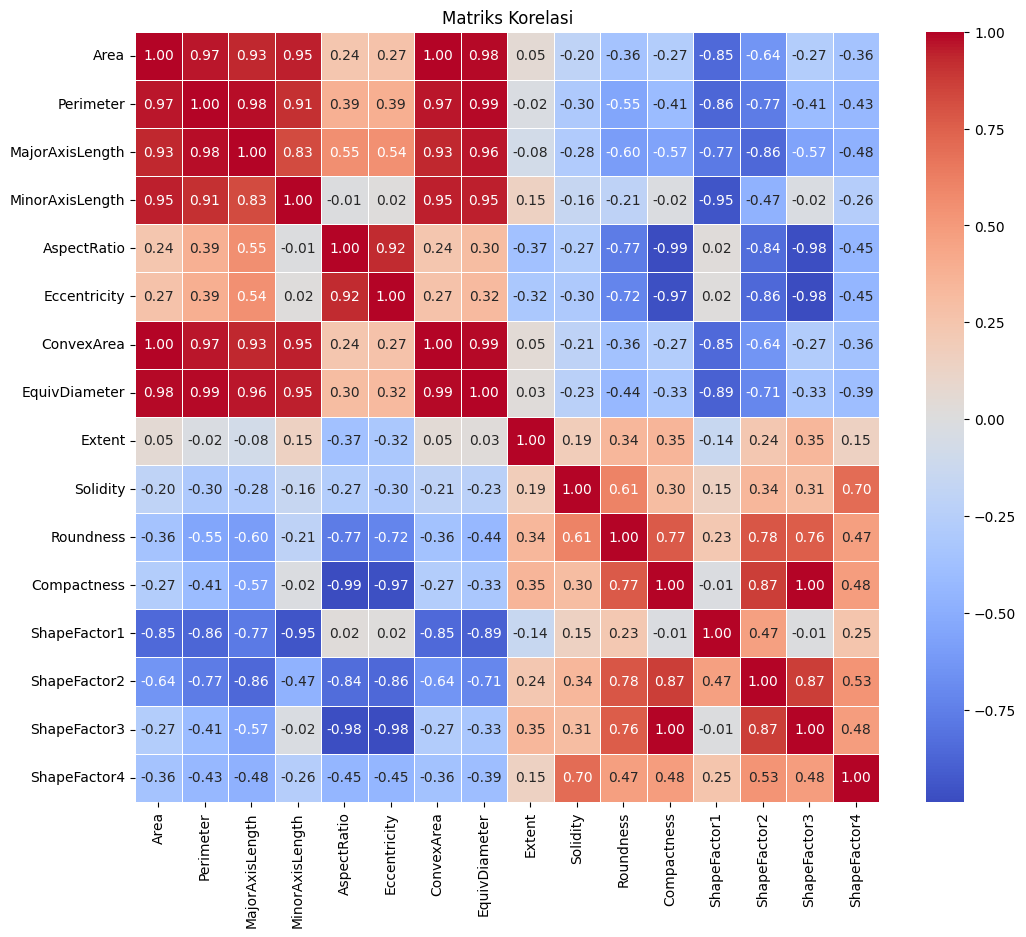

In [ ]:
# Matriks Korelasi
matriks_korelasi = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
# Pair Plot untuk Semua Variabel Berdasarkan Kelas
palette = sns.color_palette("husl", n_colors=len(df["class"].unique()))
sns.pairplot(df, hue="class", palette=palette)
plt.suptitle("Pair Plot untuk Semua Variabel Berdasarkan Kelas", y=1.02)
plt.show()

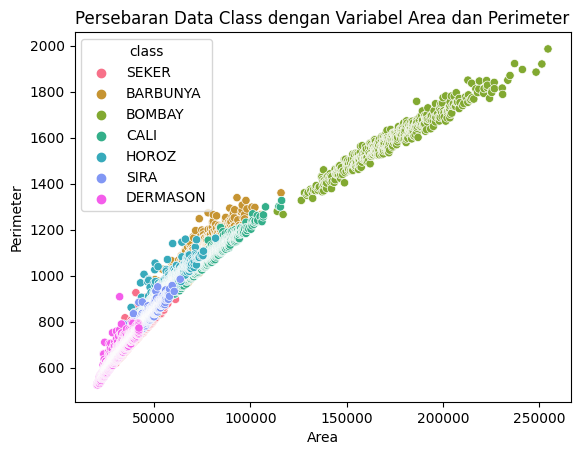

In [ ]:
# Contoh persebaran data Class berdasarkan variabel Area dan Perimeter
palette = sns.color_palette("husl", n_colors=len(df["class"].unique()))
sns.scatterplot(x="Area", y="Perimeter", hue="class", palette=palette, data=df)
plt.title("Persebaran Data Class dengan Variabel Area dan Perimeter")
plt.show()

# Ringkasan Metode
Metode yang diterapkan dalam proyek ini dapat diringkas sebagai berikut. Tahap awal melibatkan preprocessing data, dimana dataset Dry Bean dibaca, nilai-nilai yang hilang ditangani, dan data dibagi menjadi subset pelatihan dan uji. Eksplorasi data dilakukan dengan analisis statistik deskriptif, identifikasi korelasi antar atribut, dan visualisasi distribusi antar atribut menggunakan pair plot. Pembangunan model dimulai dengan mengimplementasikan model baseline menggunakan algoritma Random Forest dengan parameter dasar, diikuti oleh eksplorasi model dengan mencoba minimal tiga skema model melalui hyperparameter tuning. Evaluasi model dilakukan dengan menghitung metrik evaluasi seperti akurasi, presisi, recall, dan F1-score. Hasil evaluasi digunakan untuk memilih parameter terbaik dan memberikan wawasan tentang kinerja model dalam mengklasifikasikan dataset Dry Bean. Kesimpulan dan analisis kemudian diambil untuk mengevaluasi hasil eksperimen dan memberikan pemahaman yang mendalam tentang potensi dan keterbatasan penggunaan metode klasifikasi Random Forest pada data agronomi.

## Baseline Model

In [ ]:
# Membuat dan melatih model Random Forest menggunakan scikit-learn
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Melakukan prediksi pada set data pengujian
y_pred = random_forest.predict(X_test)

# Mengukur performa model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
recall = recall_score(y_test, y_pred, average="weighted")
f1_score = f1_score(y_test, y_pred, average="weighted")

# Menampilkan hasil
print("Akurasi Baseline Model:", accuracy)
print("Presisi Baseline Model:", precision)
print("Recall Baseline Model:", recall)
print("F1 Score Baseline Model:", f1_score)

Akurasi Baseline Model: 0.9247153874403232
Presisi Baseline Model: 0.925018570268126
Recall Baseline Model: 0.9247153874403232
F1 Score Baseline Model: 0.9248144998314299


## Eksplorasi Model

## Kode Random Forest tanpa Sklearn

In [ ]:
# Model Random Forest
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        # Inisialisasi objek RandomForest dengan parameter default atau nilai yang diberikan
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.models = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Bagi dataset secara acak dengan penggantian (bootstrap)
            indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            X_bootstrap = X.iloc[indices]
            y_bootstrap = y.iloc[indices]

            # Bangun Decision Tree (menggunakan scikit-learn's DecisionTreeClassifier)
            dt_model = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
            )
            dt_model.fit(X_bootstrap, y_bootstrap)
            self.models.append(dt_model)

    def predict(self, X):
        # Lakukan prediksi dengan setiap model dalam ensemble
        prediksi = np.array([model.predict(X) for model in self.models])

        # Prediksi dari setiap model dijumlahkan, dan prediksi paling sering dipilih untuk setiap titik data. Hasil akhirnya adalah array dari label prediksi.
        prediksi_label = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=prediksi)
        return prediksi_label

## Hyperparameter Tuning


In [ ]:
# Set hyper_params
hyper_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi dictionary hasil yang akan digunakan untuk menyimpan hasil evaluasi model
hasil = {
    "n_estimators" : [],
    "max_depth" : [],
    "min_samples_split" : [],
    "min_samples_leaf" : [],
    "accuracy" : [],
    "precision" : [],
    "recall" : [],
    "f1_score" : []
}

# Melakukan eksperimen dengan kombinasi parameter n_estimators, max_depth, min_samples_split, dan min_samples_leaf
for a in range(3):
    for b in range(3):
        for c in range(3):
            for d in range(3):
                hasil["n_estimators"].append(hyper_params["n_estimators"][a])
                hasil["max_depth"].append(hyper_params["max_depth"][b])
                hasil["min_samples_split"].append(hyper_params["min_samples_split"][c])
                hasil["min_samples_leaf"].append(hyper_params["min_samples_leaf"][d])

                # Membuat objek RandomForestKlasifikasi dengan hyperparameter yang diambil dari hyper_params
                RandomForestKlasifikasi = RandomForest(n_estimators = hyper_params["n_estimators"][a],
                                                       max_depth = hyper_params["max_depth"][b],
                                                       min_samples_split = hyper_params["min_samples_split"][c],
                                                       min_samples_leaf = hyper_params["min_samples_leaf"][d])

                # Melatih model menggunakan data X_train dan y_train dan melakukan prediksi menggunakan model yang dilatih pada data X_test.
                RandomForestKlasifikasi.fit(X_train, y_train)
                prediksi = RandomForestKlasifikasi.predict(X_test)

                # Menghitung dan menyimpan nilai evaluasi (accuracy, precision, recall, dan f1_score) dari prediksi terhadap y_test ke dalam dictionart hasil.
                hasil["accuracy"].append(accuracy_score(y_test, prediksi))
                hasil["precision"].append(precision_score(y_test, prediksi, average="weighted", zero_division=1))
                hasil["recall"].append(recall_score(y_test, prediksi, average="weighted"))
                hasil["f1_score"].append(f1_score(y_test, prediksi, average="weighted"))

# Evaluasi

In [ ]:
# Menyimpan hasil pada DataFrame keseluruhan hasil
hasil_keseluruhan = pd.DataFrame(hasil)

In [ ]:
# Menampilkan keseluruhan hasil terurut dari besar ke kecil
hasil_keseluruhan.sort_values(by = "accuracy", ascending = False).reset_index().drop("index", axis =1)

,n_estimators,max_depth,min_samples_split,min_samples_leaf,accuracy,precision,recall,f1_score
0,50,NaN,2,1,0.929122,0.929672,0.929122,0.929229
1,100,10.0,10,4,0.929122,0.929628,0.929122,0.929212
2,100,10.0,10,2,0.928021,0.928705,0.928021,0.928166
3,200,10.0,2,1,0.927286,0.927968,0.927286,0.927481
4,100,10.0,2,4,0.927286,0.927798,0.927286,0.927425
...,...,...,...,...,...,...,...,...
76,100,NaN,10,1,0.922512,0.923030,0.922512,0.922659
77,100,20.0,2,1,0.922145,0.922548,0.922145,0.922254
78,200,20.0,2,1,0.921777,0.922171,0.921777,0.921886
79,50,20.0,5,2,0.921043,0.921514,0.921043,0.921045


## Report Best Parameter

In [ ]:
RandomForestKlasifikasiTerbaik = RandomForest(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
)

RandomForestKlasifikasiTerbaik.fit(X_train, y_train)
best_prediksi = RandomForestKlasifikasiTerbaik.predict(X_test)

# Inverse transform dari label
y_test_asli = label_encoder.inverse_transform(y_test)
best_prediksi_asli = label_encoder.inverse_transform(best_prediksi)

# Mendapatkan classification report
report = classification_report(y_test_asli, best_prediksi_asli)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.95      0.93       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.97      0.96      0.97       408
       SEKER       0.96      0.93      0.94       413
        SIRA       0.87      0.87      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



#### Hasil dan Analisis
Hasil eksperimen menunjukkan bahwa model klasifikasi Random Forest pada dataset Dry Bean memberikan performa yang memuaskan. Setelah melakukan eksplorasi hyperparameter tuning dengan variasi n_estimators, max_depth, min_samples_split, dan min_samples_leaf, parameter terbaik yang dihasilkan adalah n_estimators=50, max_depth=None, min_samples_split=2, dan min_samples_leaf=1. Dengan konfigurasi ini, model mencapai akurasi sebesar 92% pada data uji. Analisis lebih lanjut mengungkapkan bahwa penggunaan jumlah pohon yang lebih sedikit (n_estimators=50) mungkin memberikan keseimbangan antara kinerja dan efisiensi komputasional. Kedalaman pohon yang tidak dibatasi (max_depth=None) memberikan fleksibilitas untuk menangkap pola kompleks dalam data, meskipun dengan risiko overfitting. Selain itu, parameter min_samples_split=2 memberikan fleksibilitas dalam pembentukan simpul, sementara min_samples_leaf=1 memberikan kebebasan penuh pada pembentukan daun. Meskipun terdapat variasi dalam kinerja antar kelas, secara keseluruhan model mampu memberikan hasil yang memuaskan dan efektif dalam mengklasifikasikan biji kacang kering berdasarkan atribut fisik dan geometrisnya.

#### Kesimpulan
Secara keseluruhan, proyek ini berhasil mengimplementasikan model klasifikasi menggunakan metode Random Forest pada dataset Dry Bean dengan hasil yang memuaskan. Melalui eksplorasi hyperparameter tuning, parameter terbaik yang diidentifikasi adalah n_estimators=50, max_depth=None, min_samples_split=2, dan min_samples_leaf=1. Model ini memberikan akurasi sebesar 92% pada data uji, menunjukkan kemampuannya dalam mengklasifikasikan biji kacang kering ke dalam kategori yang sesuai berdasarkan atribut fisik dan geometris. Hasil evaluasi model, termasuk metrik akurasi, presisi, recall, dan F1-score, memberikan pemahaman mendalam tentang kinerja model. Meskipun terdapat beberapa trade-off dalam pengaturan parameter, seperti risiko overfitting dengan kedalaman pohon yang tidak dibatasi, proyek ini memberikan wawasan berharga tentang aplikasi pembelajaran mesin dalam konteks analisis agronomi. Dengan demikian, pemahaman lebih lanjut tentang karakteristik dan kemampuan model ini dapat berkontribusi positif terhadap pengembangan metode klasifikasi pada data agraris.